# Custom Variables Examples

This notebook demonstrates how to create and use custom variables in Plotbot. Custom variables let you define derived quantities (like ratios, scaled values, or complex calculations) that automatically update with your data.

**Key concept:** 💡 For complex expressions, wrap them in `lambda:` to ensure they evaluate correctly when data loads. Scroll down and read the section on complex expressions and Lambda for more information.


## 📋 How Custom Variables Work

**Logic Flow:**
1. Define your custom variable using `custom_variable('name', expression)`
2. Call `plotbot()` to load data - this is when the calculation happens
3. Access your variable data through the properties below

**Key Properties:**
- **`.data`** - Returns time-clipped data for the **current trange** passed to `plotbot()`
- **`.all_data`** - Returns **all accumulated data** across multiple `plotbot()` calls (unclipped)
- **`.datetime_array`** - Returns time-clipped datetime objects (Python datetime) matching `.data`
- **`.time`** - Returns time-clipped TT2000 epoch times in nanoseconds (int64) matching `.data`

**When to use lambda:**
- Simple math (br * bt, br / bt): No lambda needed ✅
- NumPy functions (np.arctan2, np.degrees): Use lambda ✅
- Chained operations ((a/b) + c): Use lambda ✅


In [1]:
# Setup
import plotbot
from plotbot import *
import numpy as np

# Configure data directory
config.data_dir = '../data'

# Show status on the first run...
print_manager.show_status = True
print_manager.show_warning = False
print_manager.show_custom_debug = False

%matplotlib inline


initialized server_access
initialized global_tracker
initialized plot_config
initialized data_cubby.
initialized plot_manager
CDF classes added to data_cubby type map.
initialized epad class
initialized epad_hr class
initialized proton class
initialized proton_hr class
initialized proton_fits class
initialized alpha_fits class
initialized ham_class
initialized psp_alpha class
initialized psp_qtn class
initialized psp_orbit class
initialized psp_span_vdf class
🎛️ initialized ploptions

Importing libraries, this may take a moment. Hold tight... 

✅ Imported standard libraries and utilities.
✅ Deferred numpy, pandas, and scipy libraries (loaded when needed).
✅ Deferred matplotlib libraries (loaded when needed).
✅ Deferred heavy data libraries (cdflib, requests, bs4) - loaded when needed.

🤖 Plotbot Initialized
✨ Showdahodo initialized
Positional Data Helper Initialized
📈📉 Multiplot Initialized

🤖 Plotbot Initialized
📈📉 Multiplot Initialized
   Version: 2025_10_13_v3.68
   Commit: v3.68 fi

# Example 1: Simple Scaling

Create a custom variable that scales an existing variable by a constant. Here we convert proton temperature from eV to keV by dividing by 1000.

This is a simple operation - no `lambda` needed!


🤖 Plotbot starting (loading scientific libraries)...
🤖 Plotbot libraries loaded, proceeding...
🛰️ spi_sf00_l3_mom - acquiring variables: temperature
🛰️ custom_data_type - acquiring variables: temp_kev
 
📥 Acquiring data for 2 variables...
🕒 TimeRangeTracker: Stored trange ['2023-09-28/06:00:00', '2023-09-28/08:00:00']
🛰️ spi_sf00_l3_mom - acquiring variables: temperature
🛰️ custom_data_type - acquiring variables: temp_kev
📋 Required data types: {'spi_sf00_l3_mom', 'custom_data_type'}
🔄 Processing: spi_sf00_l3_mom
Attempting SPDF acquisition path (dynamic mode) for spi_sf00_l3_mom...
✅ Smart check found 1 local spi_sf00_l3_mom file(s):
   📁 ../data/psp/sweap/spi/l3/spi_sf00_l3_mom/2023/psp_swp_spi_sf00_l3_mom_20230928_v04.cdf
✅ Using local spi_sf00_l3_mom files (skipping pyspedas)
☑️ - CDF Data import complete for spi_sf00_l3_mom range ['2023-09-28/06:00:00', '2023-09-28/08:00:00'].

📥 Requesting DataCubby to update/merge global instance for spi_sf00_l3_mom...
🔍 PATH ANALYSIS for 'spi_s

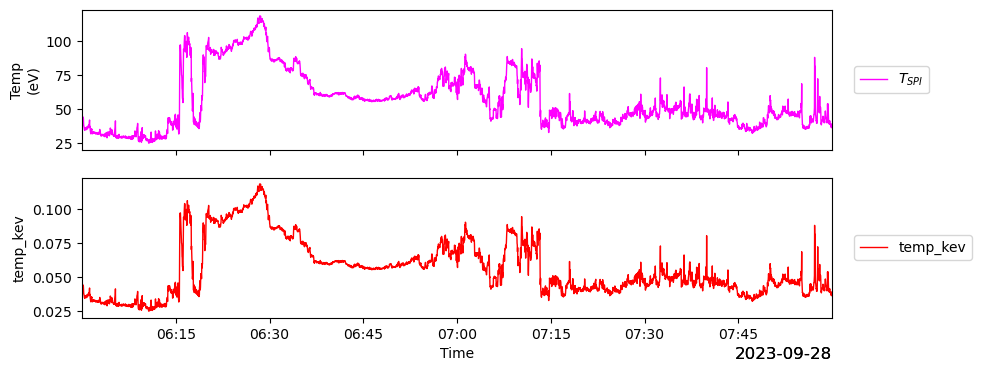

In [2]:
# Define time range
trange = ['2023-09-28/06:00:00', '2023-09-28/08:00:00']

# Create a custom variable: temperature in kiloelectronvolts (keV)
# This is automatically accessible as pb.temp_kev
temp_kev = custom_variable('temp_kev', proton.temperature / 1000)

# Set properties - could also do pb.temp_kev.color = 'red'
temp_kev.legend_label = 'Temperature (keV)'
temp_kev.color = 'red'

# Plot original and custom variable
plotbot(trange, proton.temperature, 1, temp_kev, 2)

# Example 2: Ratio of Two Variables

Create a custom variable from two different data sources. Plotbot automatically handles different cadences by resampling to the lower-cadence variable.

Here we divide proton temperature by magnetic field magnitude to see how they relate.


/Users/robertalexander/GitHub/Plotbot/plotbot/plot_manager.py:1163: RuntimeWarning: invalid value encountered in divide
  result = operation_func(self_aligned, other_aligned)


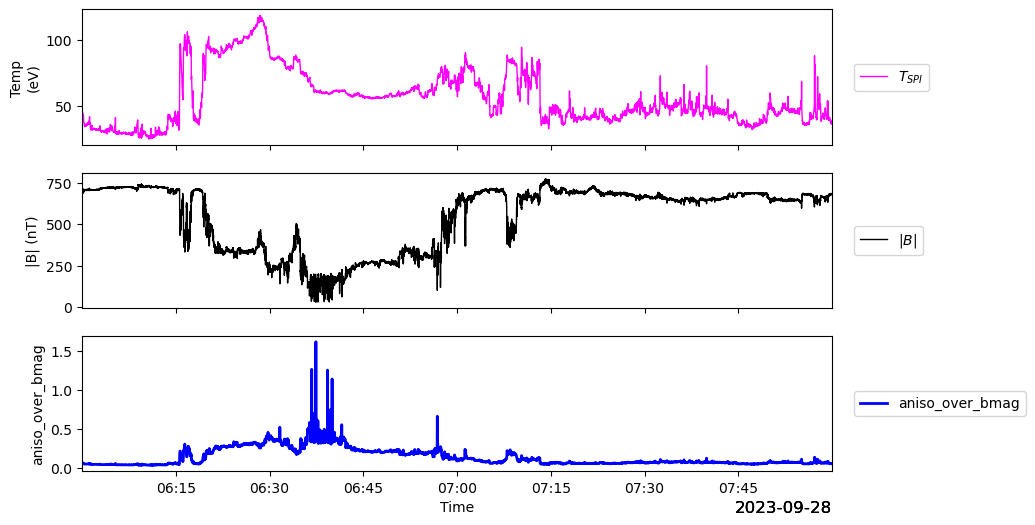

In [3]:
# Keep it quiet from here on out
print_manager.show_status = False

# Create a ratio variable
aniso_over_bmag = custom_variable('aniso_over_bmag', proton.temperature / mag_rtn_4sa.bmag)

# Customize appearance
aniso_over_bmag.color = 'blue'
aniso_over_bmag.line_width = 2
aniso_over_bmag.legend_label = 'Temperature / B_mag'

# Plot both variables
plotbot(trange, proton.temperature, 1, mag_rtn_4sa.bmag, 2, aniso_over_bmag, 3)


# Example 3: Multiple Complex Operations

Custom variables support chained operations - add, subtract, multiply, divide all in one expression.

These three examples show progressively more complex combinations of operations.


## When to Use Lambda vs Direct Expressions

| Expression Type | Syntax | Use Lambda? | Example |
|----------------|--------|-------------|---------|
| **Simple arithmetic** | `var ± scalar` | ❌ No | `proton.temperature / 1000` |
| **Simple ratio** | `var1 / var2` | ❌ No | `proton.density / mag.bmag` |
| **Single NumPy function** | `np.func(var)` | ❌ No* | `np.abs(mag.br)` works without lambda |
| **Chained operations** | `(expr1) + (expr2)` | ✅ **YES** | `(br * bt) + density` needs lambda |
| **NumPy with arithmetic** | `np.func(...) ± value` | ✅ **YES** | `np.degrees(...) + 180` needs lambda |
| **Multiple NumPy calls** | `np.func1(np.func2(...))` | ✅ **YES** | `np.degrees(np.arctan2(br, bn))` needs lambda |

**Simple rule:** If you see **more than one operation** or **NumPy function + arithmetic**, use `lambda:`.

**Why?** Direct expressions only capture the *last* operation. Lambda captures the *entire* expression and evaluates it fresh when data loads.


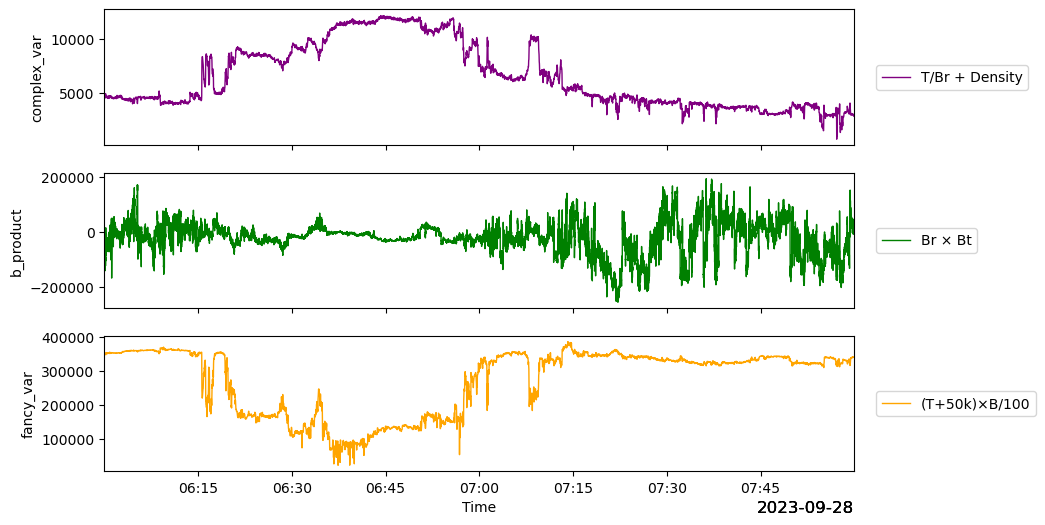

In [4]:
# Example 1: Chained operations (needs lambda!)
complex_var = custom_variable('complex_var', lambda: (proton.temperature / mag_rtn_4sa.br) + proton.density)
complex_var.color = 'purple'
complex_var.legend_label = 'T/Br + Density'

# Example 2: Multiplication of magnetic field components (needs lambda!)
b_product = custom_variable('b_product', lambda: mag_rtn_4sa.br * mag_rtn_4sa.bt)
b_product.color = 'green'
b_product.legend_label = 'Br × Bt'

# Example 3: Nested operations (needs lambda!)
fancy_var = custom_variable('fancy_var', lambda: (proton.temperature + 50000) * mag_rtn_4sa.bmag / 100)
fancy_var.color = 'orange'
fancy_var.legend_label = '(T+50k)×B/100'

# Plot all three custom variables
plotbot(trange, complex_var, 1, b_product, 2, fancy_var, 3)


# Example 4: Using Custom Variables as Inputs

You can create new custom variables from other custom variables! They act just like regular Plotbot variables.

This creates a "super custom" variable by multiplying two previously defined custom variables together.


✅ Created super_custom using two other custom variables!
   Type: <class 'plotbot.plot_manager.plot_manager'>


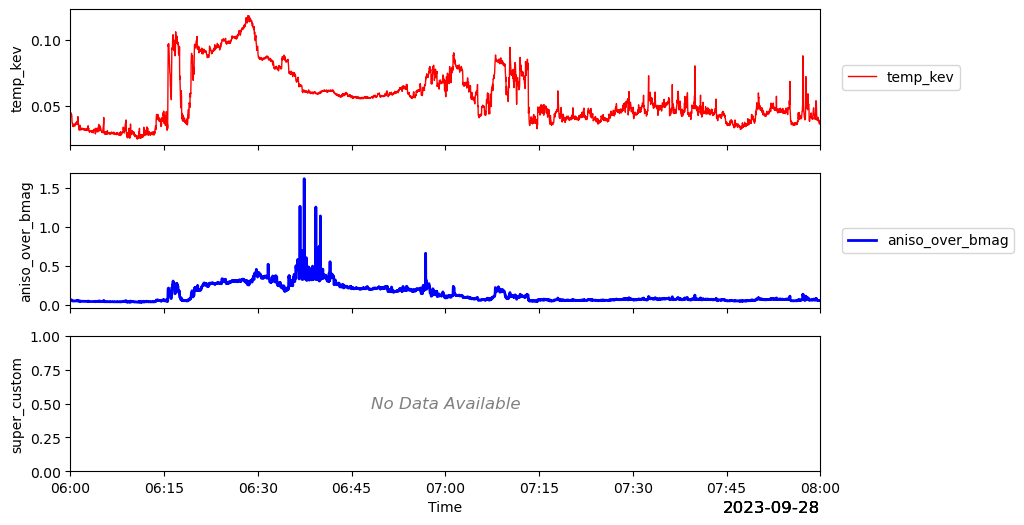

In [5]:
# Use previously created custom variables in a new calculation
super_custom = custom_variable('super_custom', lambda: temp_kev * aniso_over_bmag)
super_custom.color = 'red'
super_custom.legend_label = 'temp_kev × (T/B)'

print(f"✅ Created super_custom using two other custom variables!")
print(f"   Type: {type(super_custom)}")

# Plot it alongside its source variables
plotbot(trange, temp_kev, 1, aniso_over_bmag, 2, super_custom, 3)


# Example 5: NumPy Functions

**Important:** When using NumPy functions (like `np.arctan2`, `np.degrees`, `np.abs`), wrap the expression in `lambda:`.

Why? Without lambda, Python tries to calculate the expression immediately (before data loads). Lambda says "evaluate this later when you have data."


✅ Lambda-based custom variable created!
   Lambda ensures proper evaluation when data changes


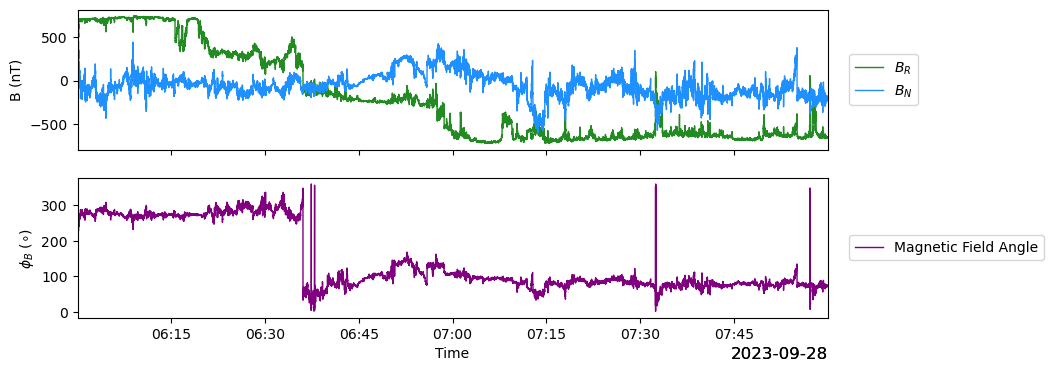

In [6]:
# Example: Magnetic field angle calculation
import numpy as np

# ✅ CORRECT: Use lambda for complex NumPy operations
phi_B = custom_variable(
    'phi_B', 
    lambda: np.degrees(np.arctan2(mag_rtn_4sa.br, mag_rtn_4sa.bn)) + 180
)

phi_B.y_label = r'$\phi_B \ (\circ)$'
phi_B.color = 'purple'
phi_B.legend_label = 'Magnetic Field Angle'

print("✅ Lambda-based custom variable created!")
print("   Lambda ensures proper evaluation when data changes")

# Plot the angle with its source components
plotbot(trange, mag_rtn_4sa.br, 1, mag_rtn_4sa.bn, 1, phi_B, 2)


# Example 6: Custom Variables with Showdahodo

Custom variables work with all Plotbot functions, not just `plotbot()`! 

Here we use a custom variable in `showdahodo()` to create a scatter plot showing the relationship between our derived ratio and the original anisotropy.


🎯 Creating scatter plot with custom variable...


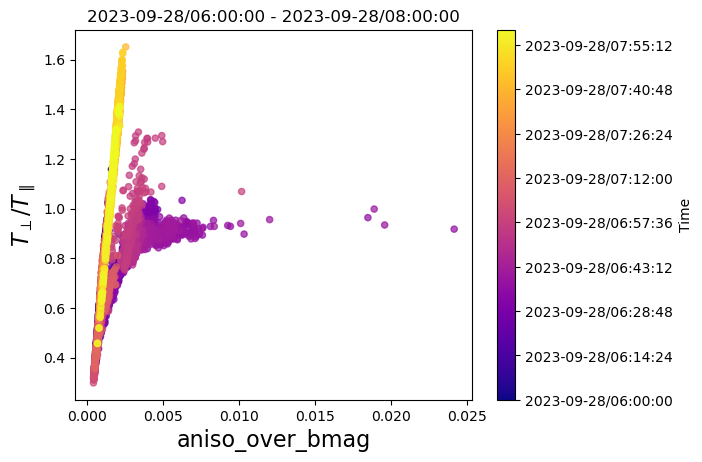

In [7]:
# Create a classic ratio variable:
aniso_over_bmag = custom_variable('aniso_over_bmag', proton.anisotropy / mag_rtn_4sa.bmag)

# Create a scatter plot using showdahodo
print("🎯 Creating scatter plot with custom variable...")
showdahodo(trange, aniso_over_bmag, proton.anisotropy);

# Example 7: Accessing Custom Variable Data

Once you've created a custom variable and called `plotbot()`, you can access its data through several properties:

- **`.data`** - Time-clipped data for the current trange
- **`.all_data`** - All accumulated data (unclipped)
- **`.datetime_array`** - Time-clipped datetime objects
- **`.time`** - Time-clipped TT2000 epoch times (nanoseconds)

Let's demonstrate with a simple custom variable:


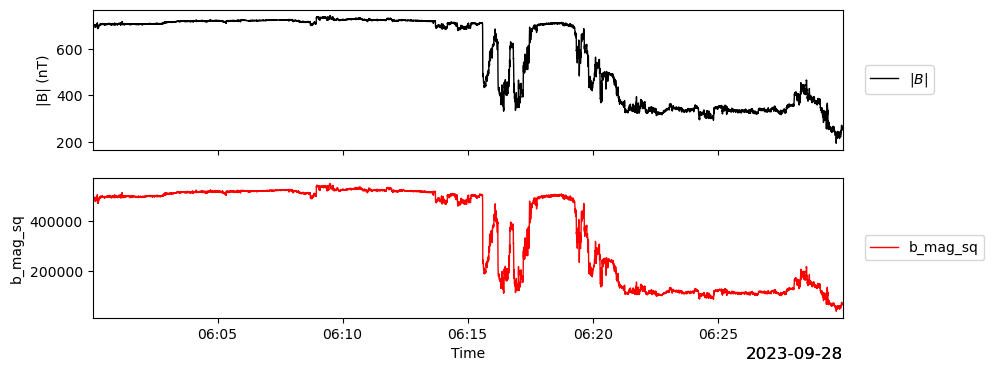

ACCESSING CUSTOM VARIABLE DATA

📊 .data (time-clipped for current trange):
   Shape: (32959,)
   First 3 values: [491648.6  490421.34 492388.47]

📦 .all_data (all accumulated data, unclipped):
   Shape: (32959,)
   First 3 values: [491648.6  490421.34 492388.47]

📅 .datetime_array (Python datetime objects):
   Shape: (32959,)
   Type: <class 'numpy.datetime64'>
   First time: 2023-09-28T06:00:00.050641024
   Last time:  2023-09-28T07:59:59.873012608

⏱️  .time (TT2000 epoch in nanoseconds):
   Shape: (32959,)
   Type: int64
   First time: 749152869234641024 ns
   Last time:  749160069057012608 ns

✅ All data access methods demonstrated!


In [8]:
# Create a simple custom variable
b_magnitude_squared = custom_variable('b_mag_sq', mag_rtn_4sa.bmag ** 2)
b_magnitude_squared.color = 'red'

# Define a time range and load data
trange_demo = ['2023-09-28/06:00:00', '2023-09-28/06:30:00']
plotbot(trange_demo, mag_rtn_4sa.bmag, 1, b_magnitude_squared, 2)

# Now access the data through different properties
print("=" * 70)
print("ACCESSING CUSTOM VARIABLE DATA")
print("=" * 70)

# 1. Access time-clipped data for current trange
data = b_magnitude_squared.data
print(f"\n📊 .data (time-clipped for current trange):")
print(f"   Shape: {data.shape}")
print(f"   First 3 values: {data[:3]}")

# 2. Access all accumulated data (unclipped)
all_data = b_magnitude_squared.all_data
print(f"\n📦 .all_data (all accumulated data, unclipped):")
print(f"   Shape: {all_data.shape}")
print(f"   First 3 values: {all_data[:3]}")

# 3. Access datetime array (Python datetime objects)
dt_array = b_magnitude_squared.datetime_array
print(f"\n📅 .datetime_array (Python datetime objects):")
print(f"   Shape: {dt_array.shape}")
print(f"   Type: {type(dt_array[0])}")
print(f"   First time: {dt_array[0]}")
print(f"   Last time:  {dt_array[-1]}")

# 4. Access TT2000 epoch times (nanoseconds since 2000-01-01)
time_array = b_magnitude_squared.time
print(f"\n⏱️  .time (TT2000 epoch in nanoseconds):")
print(f"   Shape: {time_array.shape}")
print(f"   Type: {time_array.dtype}")
print(f"   First time: {time_array[0]} ns")
print(f"   Last time:  {time_array[-1]} ns")

print("\n" + "=" * 70)
print("✅ All data access methods demonstrated!")
print("=" * 70)
